In [1]:
from rocketpy import Environment, Rocket, SolidMotor, Flight

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5.2  m
Launch Date:  2021-06-09 12:00:00  UTC
Launch Site Latitude: 41.72418°
Launch Site Longitude: 21.77422°
Launch Site Surface Elevation: 438.2 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 80.103 km
Forecast Time Period: From  2021-06-08 06:00:00  to  2021-06-18 06:00:00  UTC
Forecast Hour Interval:  3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 3.46 m/s
Surface Wind Direction: 3.49°
Surface Wind Heading: 183.49°
Surface Pressure: 962.24 hPa
Surface Temperature: 297.56 K
Surface Air Density: 1.126 kg/m³
Surface Speed of Sound: 345.81 m/s


Atmospheric Model Plots


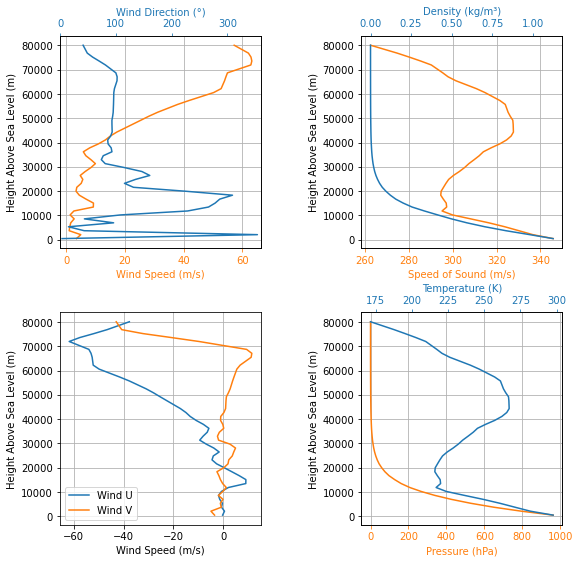

In [27]:
Env = Environment(
    railLength=5.2,
    latitude=41.724182,
    longitude=21.774216,
    elevation=206,
    date=(2021, 6, 9, 12) # Tomorrow's date in year, month, day, hour UTC format
) 
Env.setAtmosphericModel(type='Forecast', file='GFS')
Env.allInfo()

Nozzle Details
Nozzle Radius: 0.0045 m
Nozzle Throat Radius: 0.0045 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1904 kg/m3
Grain Outer Radius: 0.011 m
Grain Inner Radius: 0.0045 m
Grain Height: 0.1 m
Grain Volume: 0.000 m3
Grain Mass: 0.060 kg

Motor Details
Total Burning Time: 10.86 s
Total Propellant Mass: 0.060 kg
Propellant Exhaust Velocity: 58.260 m/s
Average Thrust: 0.323 N
Maximum Thrust: 1.1662 N at 2.74 s after ignition.
Total Impulse: 3.511 Ns

Plots


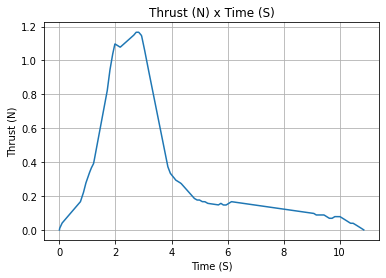

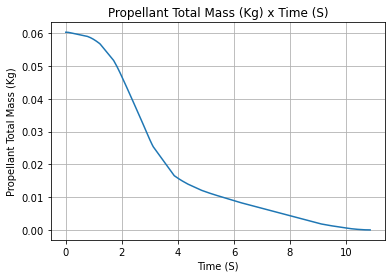

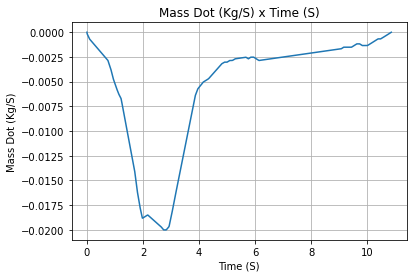

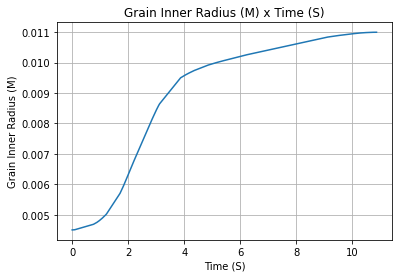

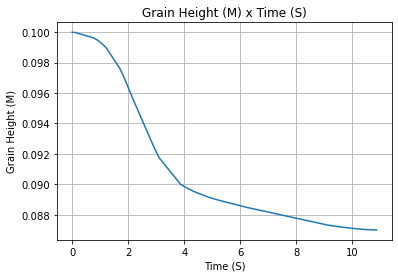

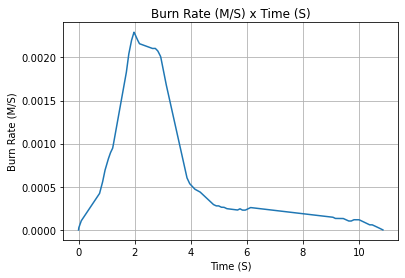

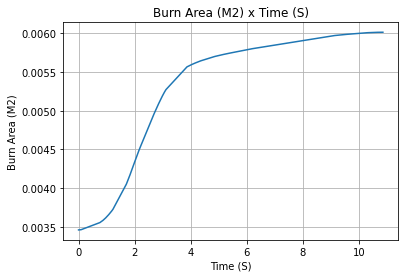

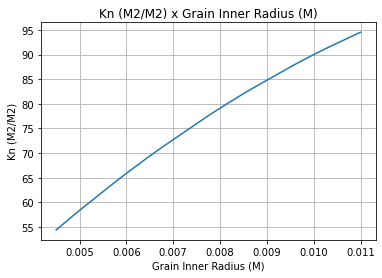

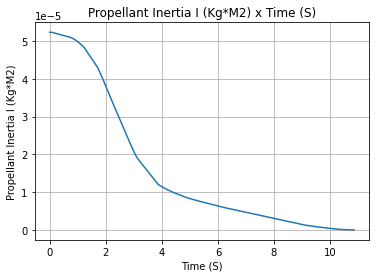

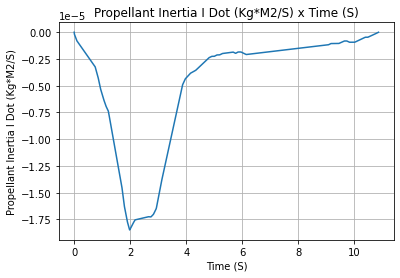

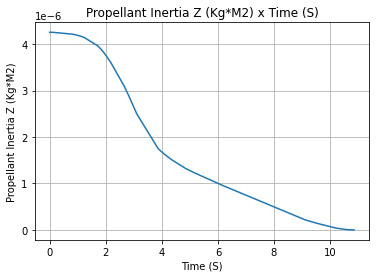

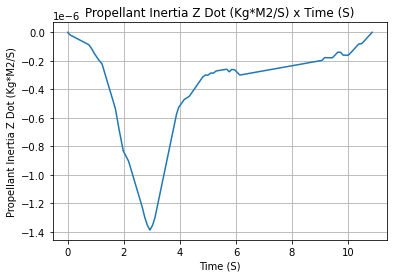

In [28]:
Skilet_v1 = SolidMotor(
    thrustSource="data/motors/Skillet_v1.eng",
    burnOut=10.86,
    grainNumber=1,
    grainDensity=1904,
    grainOuterRadius=11/1000,
    grainInitialInnerRadius=4.5/1000,
    grainInitialHeight=100/1000,
    nozzleRadius=4.5/1000,
    throatRadius=4.5/1000,
    interpolationMethod='linear'
)
Skilet_v1.allInfo()

Inertia Details
Rocket Mass: 0.001 kg (No Propellant)
Rocket Mass: 0.061 kg (With Propellant)
Rocket Inertia I: 1.000 kg*m2
Rocket Inertia Z: 0.035 kg*m2

Geometrical Parameters
Rocket Maximum Radius: 0.24 m
Rocket Frontal Area: 0.180956 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: -0.05 m
Rocket Center of Mass - Propellant Center of Mass Distance: -0.036 m
Rocket Center of Mass - Rocket Loaded Center of Mass: -0.035 m

Aerodynamic Coponents Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 0.443/rad
Tail Lift Coefficient Derivative: -0.074/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 0.999 m
Fins Center of Pressure to CM: -1.105 m
Tail Center of Pressure to CM: -1.223 m
Distance - Center of Pressure to CM: 0.676 m
Initial Static Margin: -1.481 c
Final Static Margin: -1.407 c

Mass Plots


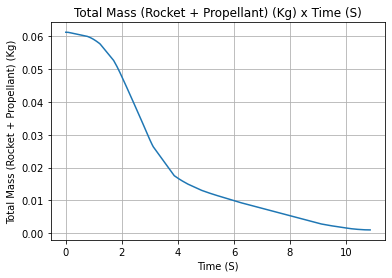

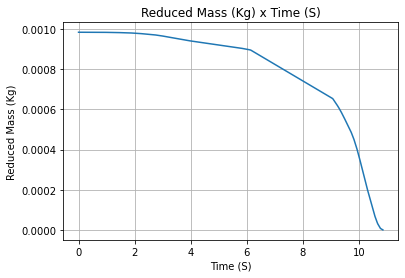


Aerodynamics Plots


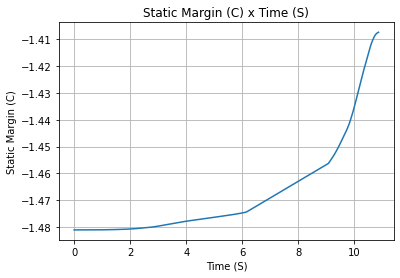

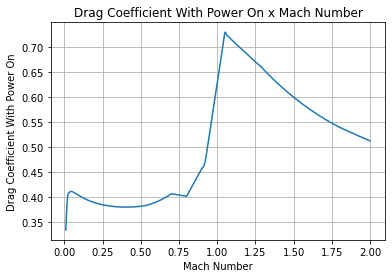

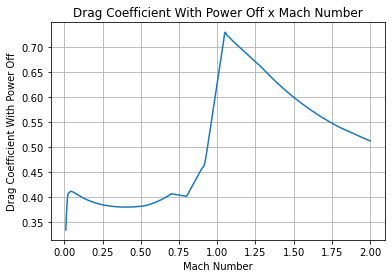

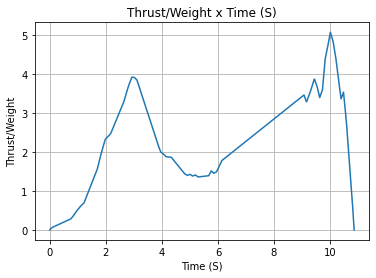

In [43]:
Calisto = Rocket(
    motor=Skilet_v1,
    radius=127/2000,
    mass=19.197-2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag='../data/calisto/powerOffDragCurve.csv',
    powerOnDrag='../data/calisto/powerOnDragCurve.csv'
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956)

Tail = Calisto.addTail(topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656)

In [44]:
def drogueTrigger(p, y):
    return True if y[5] < 0 else False

def mainTrigger(p, y):
    return True if y[5] < 0 and y[2] < 800 else False

Main = Calisto.addParachute('Main',
                            CdS=10.0,
                            trigger=mainTrigger, 
                            samplingRate=105,
                            lag=1.5,
                            noise=(0, 8.3, 0.5))

Drogue = Calisto.addParachute('Drogue',
                              CdS=1.0,
                              trigger=drogueTrigger, 
                              samplingRate=105,
                              lag=1.5,
                              noise=(0, 8.3, 0.5))

In [45]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 438.15 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -3.45 m/s
Lateral Surface Wind Speed: 0.21 m/s


 Rail Departure State

Rail Departure Time: 0.000 s
Rail Departure Velocity: 0.000 m/s
Rail Departure Static Margin: -1.481 c
Rail Departure Angle of Attack: 85.009°
Rail Departure Thrust-Weight Ratio: 0.000
Rail Departure Reynolds Number: 1.018e+05


BurnOut State

BurnOut time: 10.860 s
Altitude at burnOut: 0.000 m (AGL)
Rocket velocity at burnOut: 0.000 m/s
Freestream velocity at burnOut: 3.455 m/s
Mach Number at burnOut: 0.010
Kinetic energy at burnOut: 0.000e+00 J


Apogee

Apogee

C:\Users\vase_\miniconda3\lib\site-packages\rocketpy\Flight.py:2367: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax1.set_zlim3d([0, maxZ])
C:\Users\vase_\miniconda3\lib\site-packages\rocketpy\Flight.py:2368: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax1.set_ylim3d([minXY, maxXY])
C:\Users\vase_\miniconda3\lib\site-packages\rocketpy\Flight.py:2369: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax1.set_xlim3d([minXY, maxXY])


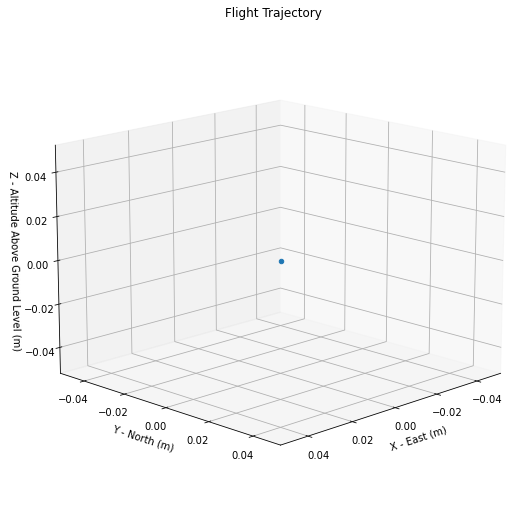



Trajectory Kinematic Plots



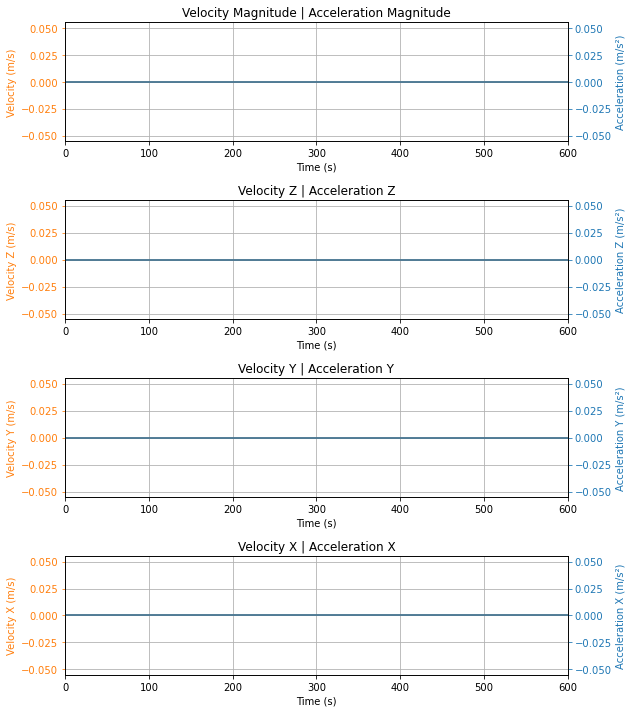



Angular Position Plots



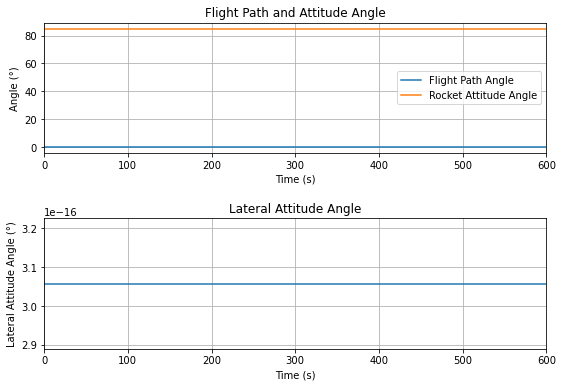



Path, Attitude and Lateral Attitude Angle plots



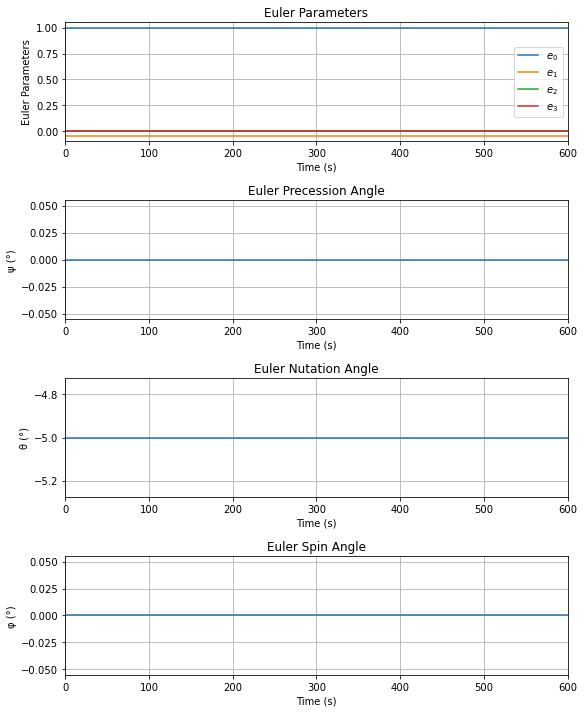



Trajectory Angular Velocity and Acceleration Plots



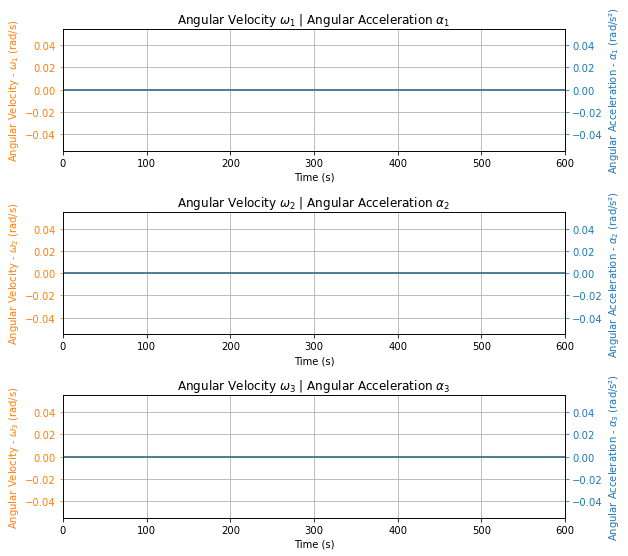



Trajectory Force Plots



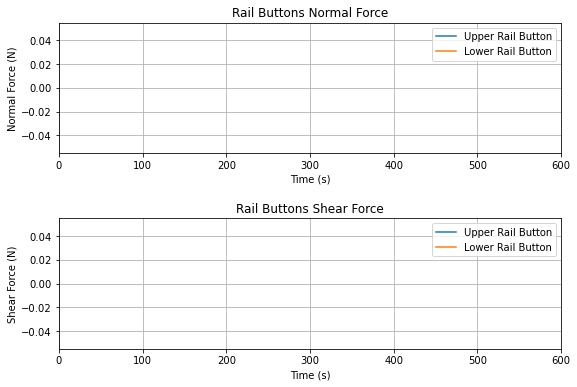

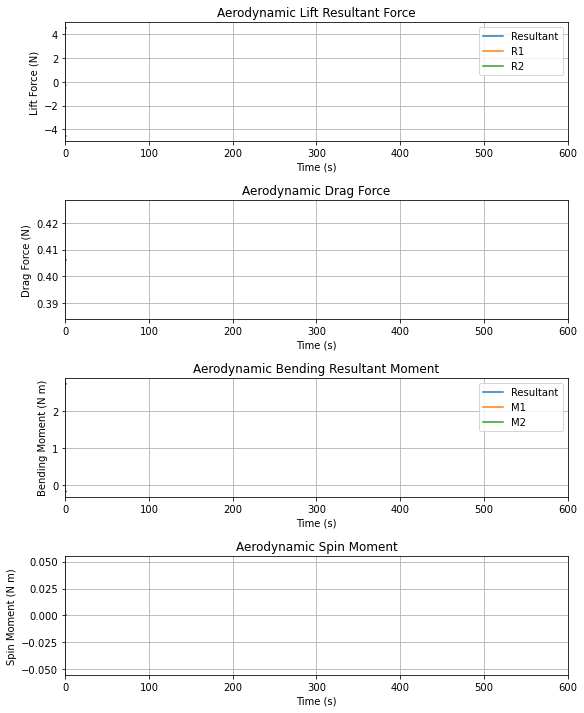



Trajectory Energy Plots



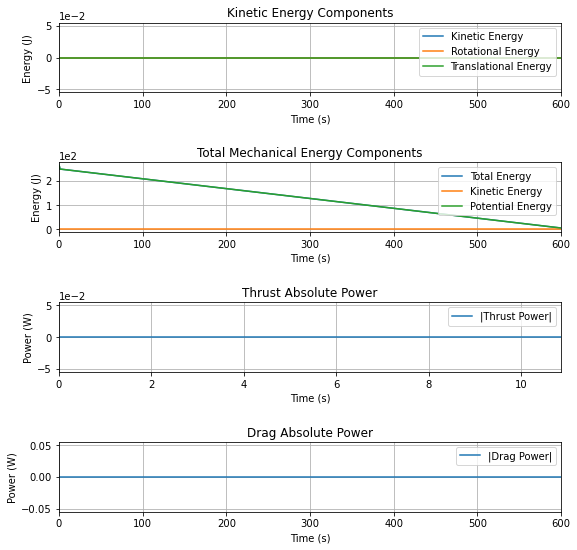



Trajectory Fluid Mechanics Plots



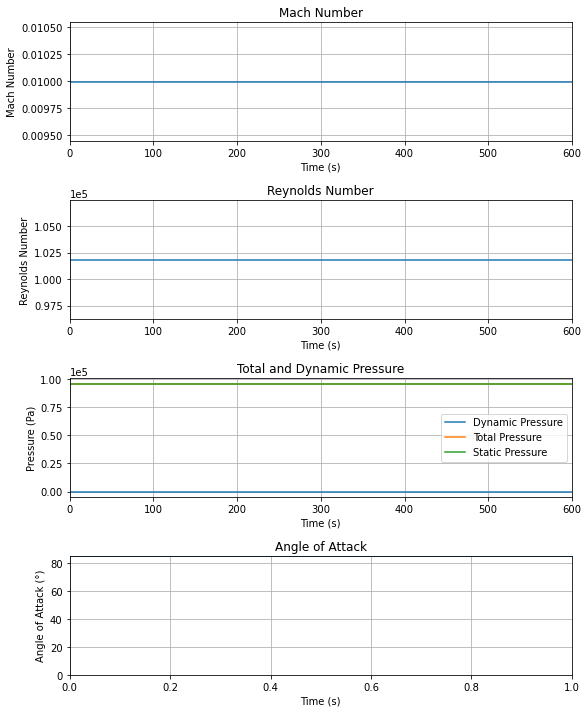



Trajectory Stability and Control Plots



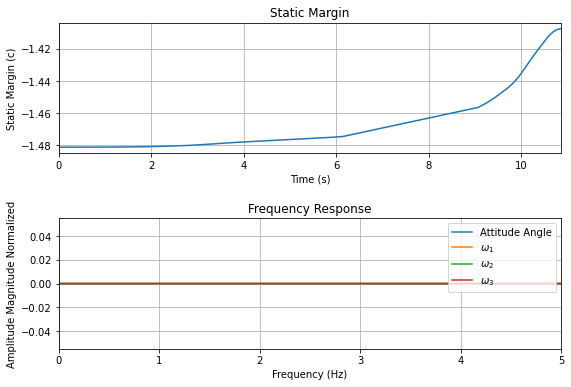

In [46]:
TestFlight.allInfo()